# hands on tutorial


In [1]:
#import necessary python packages
import scanpy as sc #software suite of tools for single-cell analysis in python
import besca as bc #internal BEDA package for single cell analysis
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy

sc.logging.print_versions() #output an overview of the software versions that are loaded

scanpy==1.4.5.1 anndata==0.7.1 umap==0.3.10 numpy==1.16.2 scipy==1.4.1 pandas==0.24.1 scikit-learn==0.22.1 statsmodels==0.11.1 python-igraph==0.7.1 louvain==0.6.1


In [2]:
from IPython.display import HTML
task = "<style>div.task { background-color: #ffc299; border-color: #ff944d; border-left: 7px solid #ff944d; padding: 1em;} </style>"
HTML(task)

In [3]:
tag = "<style>div.tag { background-color: #99ccff; border-color: #1a8cff; border-left: 7px solid #1a8cff; padding: 1em;} </style>"
HTML(tag)

In [4]:
FAIR = "<style>div.fair { background-color: #d2f7ec; border-color: #d2f7ec; border-left: 7px solid #2fbc94; padding: 1em;} </style>"
HTML(FAIR)

## Dataset Loading


In [5]:
#adata = sc.read(filepath)
adata = bc.datasets.pbmc_storage_raw()

<div class="task">
    <p>1. How many cells does this dataset contain? </p>
    <p>2. How many genes does this dataset contain? </p>
    <p>3. Which categories of sample annotation are present? </p>
    <p>4. How many cells are from each Donor? Is it an equal distribution? </p>
    <p>5. How many cells are from each Storage Condition? Is it an equal distribution? Do you think this is a random stochastic result? </p>
</div>

In [6]:
## solution 1 and 2
adata

AnnData object with n_obs × n_vars = 13066 × 19883 
    obs: 'CELL', 'CONDITION', 'experiment', 'sample_type', 'storage_condition', 'donor', 'batch'
    var: 'ENSEMBL', 'SYMBOL'

In [7]:
## solution 3
adata.obs.head(5)

CELL  \
index                                                                                              
6.6K_inhouse_Donor_1_FRESH.AACCGCGAGGGTCTCC-1      6.6K_inhouse_Donor_1_FRESH.AACCGCGAGGGTCTCC-1   
6.6K_inhouse_Donor_3A_24h_RT.GGCAATTCAGACGCCT-1  6.6K_inhouse_Donor_3A_24h_RT.GGCAATTCAGACGCCT-1   
6.6K_inhouse_Donor_2_FROZEN.CGGCTAGAGCTATGCT-1    6.6K_inhouse_Donor_2_FROZEN.CGGCTAGAGCTATGCT-1   
6.6K_inhouse_Donor_2_FRESH.CTCGGGATCCTATGTT-1      6.6K_inhouse_Donor_2_FRESH.CTCGGGATCCTATGTT-1   
6.6K_inhouse_Donor_3A_FROZEN.GCGCGATAGTTCGATC-1  6.6K_inhouse_Donor_3A_FROZEN.GCGCGATAGTTCGATC-1   

                                                    CONDITION  \
index                                                           
6.6K_inhouse_Donor_1_FRESH.AACCGCGAGGGTCTCC-1    PBMC_healthy   
6.6K_inhouse_Donor_3A_24h_RT.GGCAATTCAGACGCCT-1  PBMC_healthy   
6.6K_inhouse_Donor_2_FROZEN.CGGCTAGAGCTATGCT-1   PBMC_healthy   
6.6K_inhouse_Donor_2_FRESH.CTCGGGATCCTATGTT-1    PBMC_healthy   
6.6K_inhouse_Donor_3A_FROZEN.GCGCGATAGTTCGATC-1  PBMC_healthy   

                                                                                experiment  \
index                                                                                        
6.6K_inhouse_Donor_1_FRESH.AACCGCGAGGGTCTCC-1    6.6k_healthy_pbmc_storage_effects_inhouse   
6.6K_inhouse_Donor_3A_24h_RT.GGCAATTCAGACGCCT-1  6.6k_healthy_pbmc_storage_effects_inhouse   
6.6K_inhouse_Donor_2_FROZEN.CGGCTAGAGCTATGCT-1   6.6k_healthy_pbmc_storage_effects_inhouse   
6.6K_inhouse_Donor_2_FRESH.CTCGGGATCCTATGTT-1    6.6k_healthy_pbmc_storage_effects_inhouse   
6.6K_inhouse_Donor_3A_FROZEN.GCGCGATAGTTCGATC-1  6.6k_healthy_pbmc_storage_effects_inhouse   

                                                sample_type storage_condition  \
index                                                                           
6.6K_inhouse_Donor_1_FRESH.AACCGCGAGGGTCTCC-1          PBMC             fresh   
6.6K_inhouse_Donor_3A_24h_RT.GGCAATTCAGACGCCT-1        PBMC            24h_RT   
6.6K_inhouse_Donor_2_FROZEN.CGGCTAGAGCTATGCT-1         PBMC            frozen   
6.6K_inhouse_Donor_2_FRESH.CTCGGGATCCTATGTT-1          PBMC             fresh   
6.6K_inhouse_Donor_3A_FROZEN.GCGCGATAGTTCGATC-1        PBMC            frozen   

                                                    donor      batch  
index                                                                 
6.6K_inhouse_Donor_1_FRESH.AACCGCGAGGGTCTCC-1     Donor_1  flowcell1  
6.6K_inhouse_Donor_3A_24h_RT.GGCAATTCAGACGCCT-1  Donor_3A  flowcell1  
6.6K_inhouse_Donor_2_FROZEN.CGGCTAGAGCTATGCT-1    Donor_2  flowcell1  
6.6K_inhouse_Donor_2_FRESH.CTCGGGATCCTATGTT-1     Donor_2  flowcell1  
6.6K_inhouse_Donor_3A_FROZEN.GCGCGATAGTTCGATC-1  Donor_3A  flowcell1

In [8]:
## solution 4
adata.obs.donor.value_counts()

Donor_3A    4652
Donor_1     4562
Donor_2     3852
Name: donor, dtype: int64

In [9]:
## solution 5
adata.obs.storage_condition.value_counts()

fresh     5111
24h_RT    5062
frozen    2893
Name: storage_condition, dtype: int64

## Quality Control

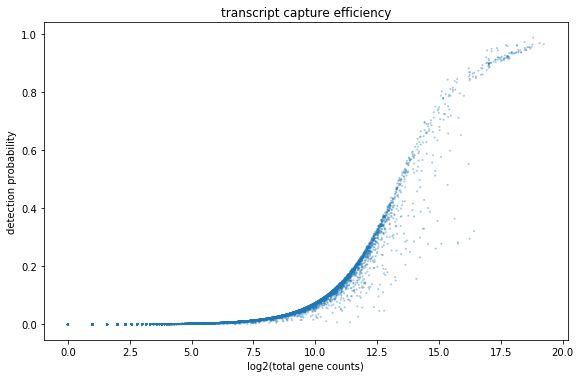

In [10]:
fig, ax = plt.subplots(1)
fig.set_figwidth(8)
fig.set_figheight(5)
fig.tight_layout()

bc.pl.transcript_capture_efficiency(adata,ax=ax)

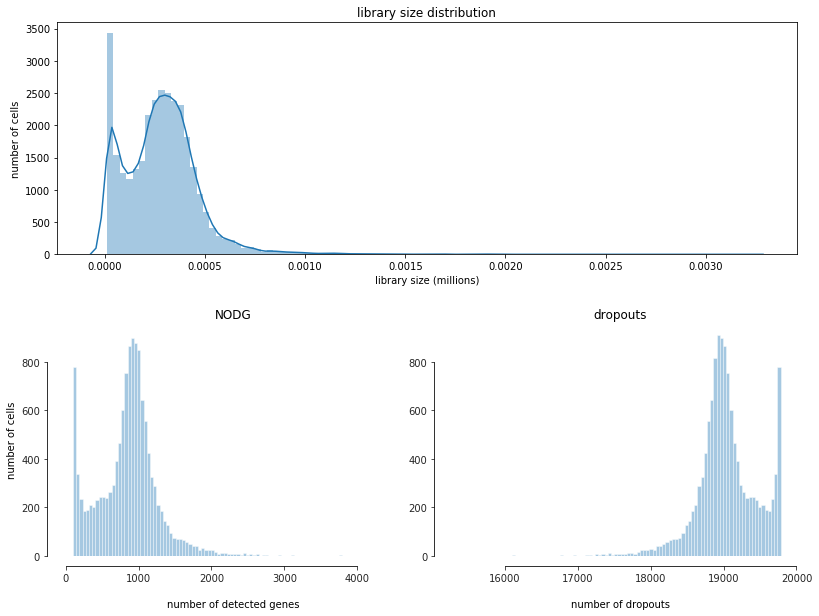

In [11]:
fig = bc.pl.librarysize_overview(adata, bins=100)

## Preprocessing

<div class="task">
    <p> 6. what do you think are reasonable cutoffs for this dataset? Why do we filter for these particular cutoffs? </p>
</div>

In [12]:
## solution 6

min_genes = 650
min_counts= 1600
min_cells = 30
max_genes = 3000
max_counts = 15000
max_mito = 0.15

adding percent mitochondrial genes to dataframe for species human


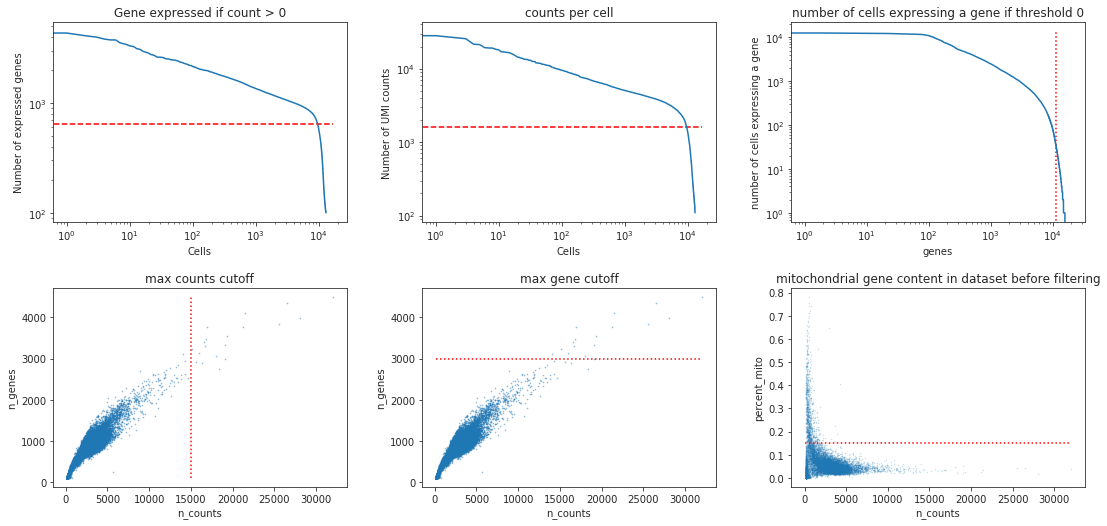

In [13]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6))= plt.subplots(ncols=3, nrows=2)
fig.set_figwidth(16)
fig.set_figheight(8)
fig.tight_layout(pad=4.5)

bc.pl.kp_genes(adata, min_genes=min_genes, ax = ax1)
bc.pl.kp_counts(adata, min_counts = min_counts, ax = ax2)
bc.pl.kp_cells(adata, min_cells=min_cells, ax = ax3)

bc.pl.max_counts(adata, max_counts=max_counts, ax = ax4)
bc.pl.max_genes(adata, max_genes = max_genes, ax = ax5)
bc.pl.max_mito(adata, max_mito=max_mito, annotation_type='SYMBOL', species='human', ax = ax6)

In [14]:
adata = bc.pp.filter(adata, max_counts=max_counts, max_genes = max_genes, max_mito = max_mito, min_genes = min_genes, min_cells = min_cells, min_counts = min_counts)

started with  13066  total cells and  19883  total genes
removed 16 cells that expressed more than 3000 genes
removed 3492 cells that did not express at least 650  genes
removed 4 cells that had more than 15000  counts
removed 210 cells that did not have at least 1600 counts
removed 8383 genes that were not expressed in at least 30 cells
removed  29  cells that expressed  15.0 percent mitochondrial genes or more
finished with 9315  total cells and 11500 total genes


<div class="task">
    <p> 7. Were there differences in viability between Donors? </p>
</div>

In [15]:
## Solution 7
adata.obs.donor.value_counts()

Donor_3A    3814
Donor_1     2879
Donor_2     2622
Name: donor, dtype: int64

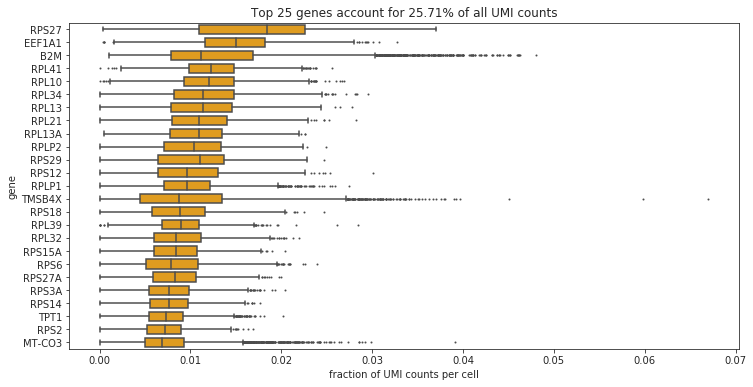

In [16]:
bc.pl.top_genes_counts(adata=adata, top_n=25, ax=None)

<div class="task">
    <p> 8. Which are the most commonly expressed genes? Is this what you would expect? </p>
</div>

## Normalization


In [17]:
#normalize per cell
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)

#save a copy (logarithmized for better understanding of values) to adata.raw
adata.raw = sc.pp.log1p(adata, copy= True)

<div class="fair">
    <p> write out cp10k values for loading into database</p>
    <p> `bc.st.export_cp10k(adata=adata, basepath='FILEPATH_TO_FOLDER_CONTAINING_RAW_SUBFOLDER')` </p>
</div>

<div class="task">
    <p> 9. What does a cp10k of 10 mean? Why do we normalize to cp10k? </p>
</div>

## variance in the dataset

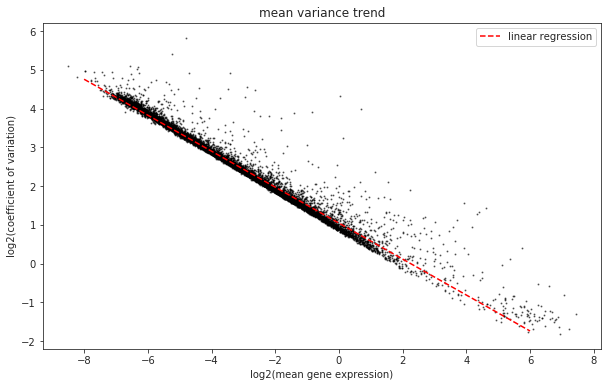

In [18]:
# calculate mean and coefficient of variation for each gene and add to adata.var
adata.var['mean'] = adata.X.todense().mean(axis = 0).tolist()[0]
adata.var['mean_log1p'] = np.log2(adata.var.get('mean').values)
adata.var['coeffvar'] = scipy.stats.variation(adata.X.todense(), axis = 0)
adata.var['coeffvar_log1p'] = np.log2(adata.var.get('coeffvar').values)

#generate a plot of our data to visualize
x = adata.var.mean_log1p.to_frame()
y = adata.var.coeffvar_log1p.to_frame()

#calculate linear fit between mean and cv
from sklearn import linear_model

#generate linear model
lm = linear_model.LinearRegression()
model = lm.fit(x,y)

#make predictions
X = range(int(min(x['mean_log1p'])), int(max(x['mean_log1p'])))
predictions = lm.predict(pd.DataFrame(data = list(X)))

#generate plot
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x = x, y = y, alpha = 0.5, s=1, color = 'black')
ax.set_xlabel('log2(mean gene expression)')
ax.set_ylabel('log2(coefficient of variation)')
ax.set_title('mean variance trend')
ax.plot(X, predictions, color = 'red', linestyle = 'dashed', label="linear regression")
ax.legend()

<div class="task">
    <p> 10. What trend can we see in the dataset? Why does it make sense that we observe this trend? Which genes are the ones that interest us? </p>
</div>

## selection highly variable genes

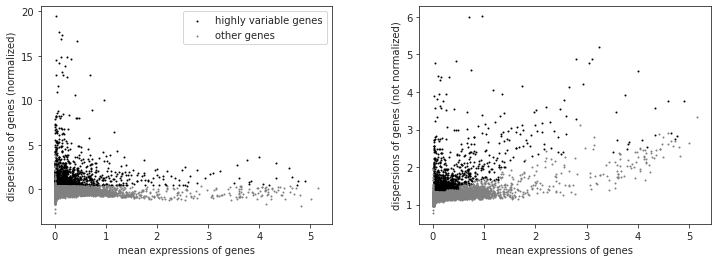

number of variable genes selected  1518


In [19]:
variable_genes_min_mean = 0.01
variable_genes_max_mean = 5
variable_genes_min_disp = 0.4

#identify genes with variable expression
filter_result = sc.pp.filter_genes_dispersion(adata.X, min_mean=variable_genes_min_mean, max_mean=variable_genes_max_mean, min_disp=variable_genes_min_disp) 
sc.pl.filter_genes_dispersion(filter_result)
nbr_variable_genes = sum(filter_result.gene_subset)
print('number of variable genes selected ', nbr_variable_genes )

In [20]:
#perform the actual filtering
adata = adata[:, filter_result.gene_subset]

<div class="task">
    <p> 11. Why do we reduce the number of genes that we look at? What do the genes we select have in common? </p>
</div>

In [21]:
#log transform our data (is easier to work with numbers like this)
sc.pp.log1p(adata)

## unwanted sources of variance

In [22]:
#define several input factors
random_seed = 0 #define a random seed so that for stochastic processes you get reproducible results
max_value = 10

<div class="task">
    <p> 12. What is a potential issue when removing unwanted sources of variance? </p>
</div>

In [23]:
#remove variance due to difference in counts and percent mitochondrial gene content
adata = sc.pp.regress_out(adata, ['n_counts', 'percent_mito'], copy=True)

In [24]:
sc.pp.scale(adata, max_value=10) # Scale data to unit variance and zero mean, and cut-off at max value 10

<div class="fair">
    <p> write out regressedOut values for loading into database</p>
    <p> `bc.st.export_regressedOut(adata = adata, basepath='FILEPATH_TO_FOLDER_CONTAINING_RAW_SUBFOLDER')` </p>
</div>

<div class="task">
    <p> 13. Besides regressOut what else might we consider correcting for? Why is it possible in this dataset? </p>
</div>

### batch correction

In [25]:
adata_uncorrected = adata.copy()

In [26]:
%%time
# since this code takes a long time (25mins), commented it out (see also below). To execute please feel free to uncomment it.
#adata_mnn = bc.st.batch_correction(adata, 'storage_condition')

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.39 µs


```
Performing cosine normalization...
Starting MNN correct iteration. Reference batch: 0
Step 1 of 2: processing batch 1
  Looking for MNNs...
  Computing correction vectors...
  Adjusting variance...
  Applying correction...
Step 2 of 2: processing batch 2
  Looking for MNNs...
  Computing correction vectors...
  Adjusting variance...
  Applying correction...
MNN correction complete. Gathering output...
Packing AnnData object...
Done.
postprocessing performed. adata contains original .raw
```

<div class="tag">
    <p> We will continue doing each step both for the corrected and the uncorrected dataset so that we can compare our results. </p>
</div>

In [27]:
adata.obs.index = adata.obs.CELL

## Principle component analysis

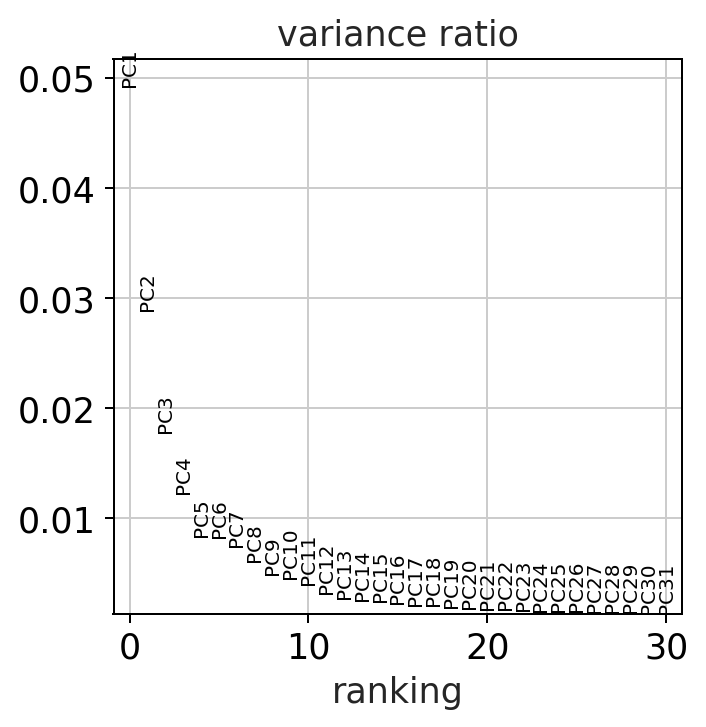

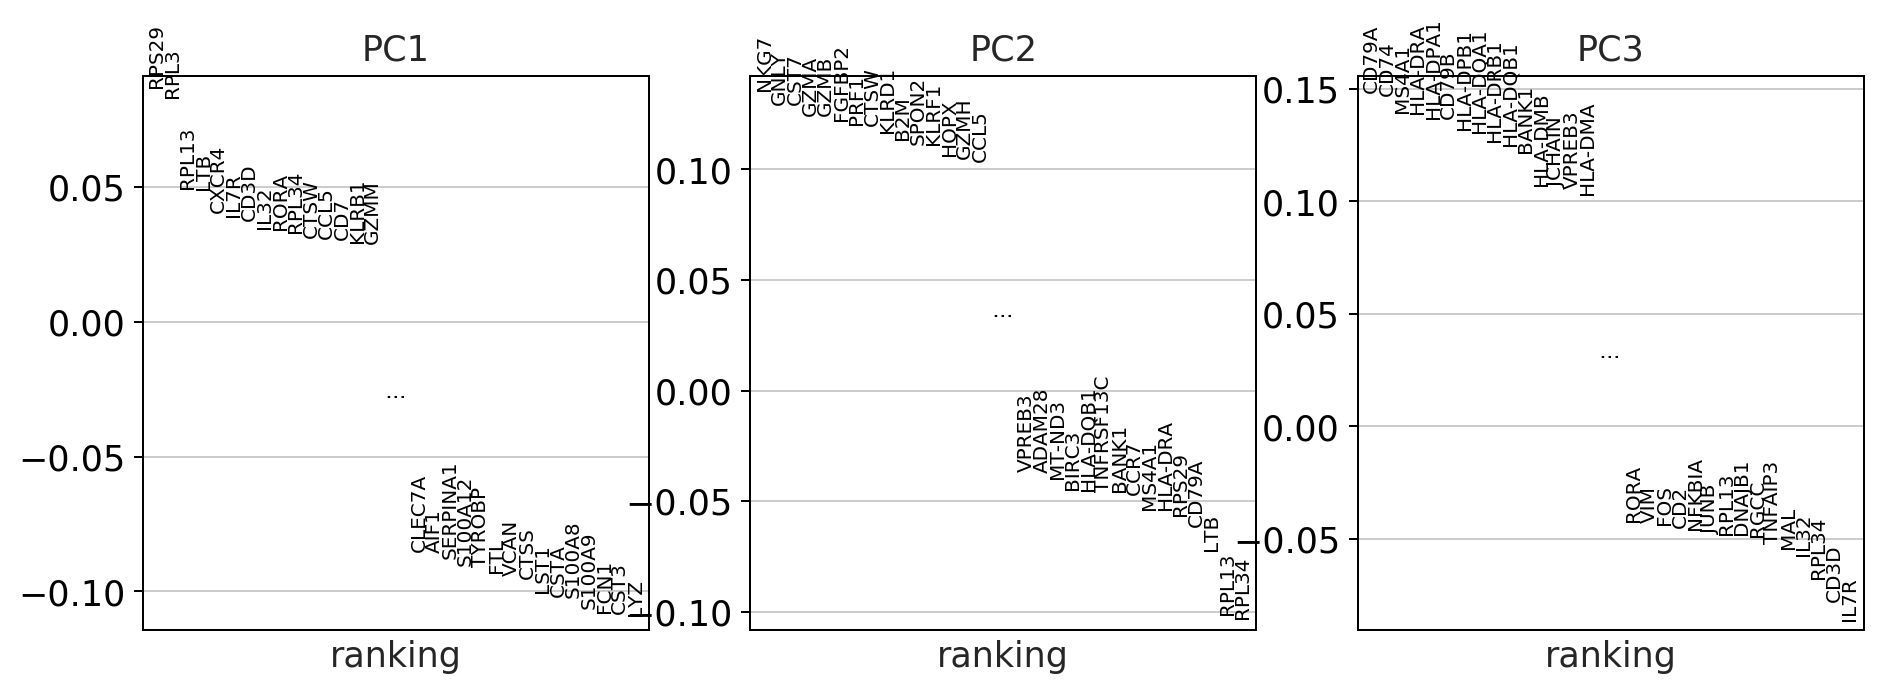

In [28]:
sc.settings.set_figure_params(dpi=90)

#calculate 50 principle components of the dataset
#sc.tl.pca(adata_mnn, random_state=random_seed, svd_solver='arpack') # Please uncomment if you calculated adata_mnn (see above)
sc.tl.pca(adata_uncorrected, random_state = random_seed, svd_solver = 'arpack')

#visualize the amount of variance explained by each PC
#sc.pl.pca_variance_ratio(adata_mnn) # Please uncomment if you calculated adata_mnn (see above)
sc.pl.pca_variance_ratio(adata_uncorrected)

#visualize the loadings onto the first 3 PCs
#sc.pl.pca_loadings(adata_mnn) # Please uncomment if you calculated adata_mnn (see above)
sc.pl.pca_loadings(adata_uncorrected)

<div class="task">
    <p> 14. Do we observe differences in the amount of variance that the PCs explain in the corrected vs the uncorrected data?  why might this be? </p>
</div>

## nearest neighbor calculation

Computes a neighborhood graph of the cells based on the first 50 principle components.

In [29]:
#for comparision purposes we will look at a second batch correction method
adata_bbknn = adata_uncorrected.copy()

In [30]:
%%time
sc.pp.neighbors(adata_uncorrected, n_neighbors=15, random_state = random_seed, n_pcs=50)
#sc.pp.neighbors(adata_mnn, n_neighbors=15, random_state = random_seed, n_pcs=50) # Please uncomment if you calculated adata_mnn (see above)

CPU times: user 5.75 s, sys: 48 ms, total: 5.8 s
Wall time: 5.79 s


The second batch correction method we will look at for comparision purposes is called bbknn. This method introduces the batch correction during the calculation of the nearest neighbors. It splits your dataset into a smaller number of batches and ensures that each cell is connected to atleast a small number of other cells from each batch. This will bring the more closely related cells from each batch closer together. A huge benefit is that it works extremely quickly.

In [31]:
%%time
#perform batch correction using bbknn (graph based batch correction method)
import bbknn
bbknn.bbknn(adata_bbknn, batch_key='storage_condition') #perform alternative batch correction method

CPU times: user 1.54 s, sys: 2.19 ms, total: 1.54 s
Wall time: 1.53 s


## louvain clustering

In [32]:
sc.tl.louvain(adata_uncorrected, random_state = random_seed)
#sc.tl.louvain(adata_mnn, random_state=random_seed) # Please uncommentn if you calculated adata_mnn (see above)
sc.tl.louvain(adata_bbknn, random_state = random_seed)

## UMAP

In [33]:
%%time

##Warning this code block will take 1-2mins to execute
sc.tl.umap(adata_uncorrected, random_state = random_seed)
#sc.tl.umap(adata_mnn, random_state = random_seed) # Please uncomment if you calculated adata_mnn (see above)
sc.tl.umap(adata_bbknn, random_state = random_seed)

CPU times: user 44.1 s, sys: 79.9 ms, total: 44.2 s
Wall time: 44.1 s


<div class="tag">
    <p> Due to the larger dataset calculating the t-SNE plot would already take several minutes wich is why we left it out </p>
</div>

## Visualize our Results

uncorrected


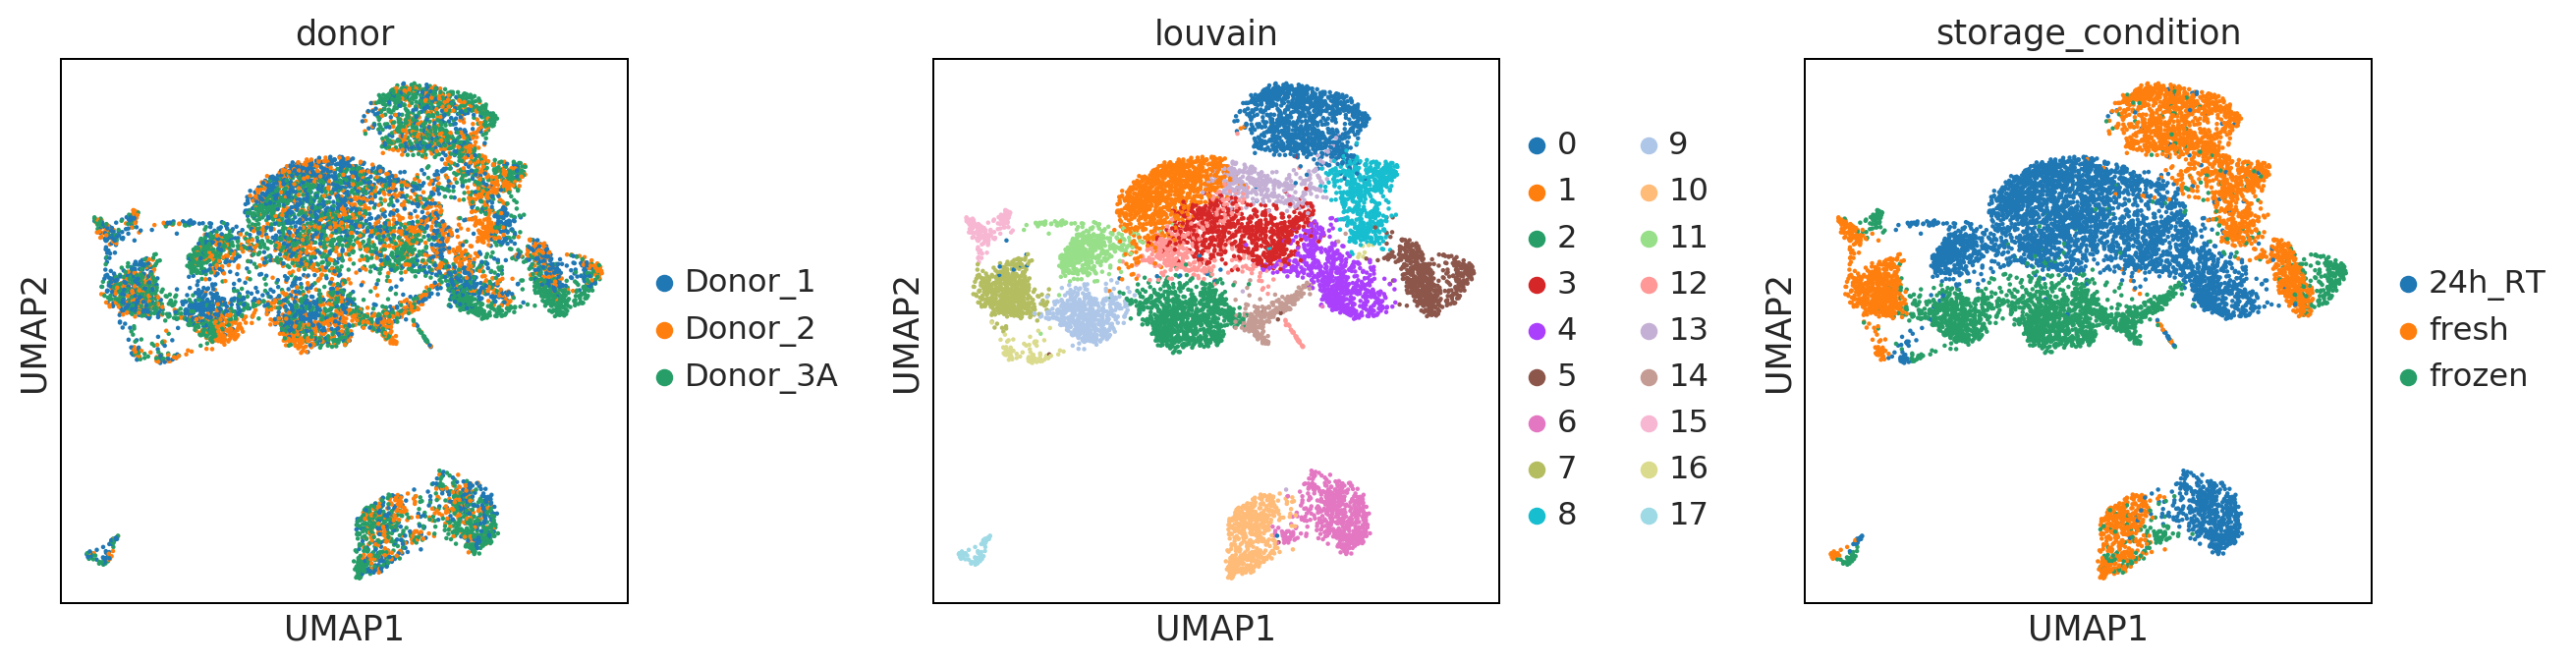

mnnpy
bbknn


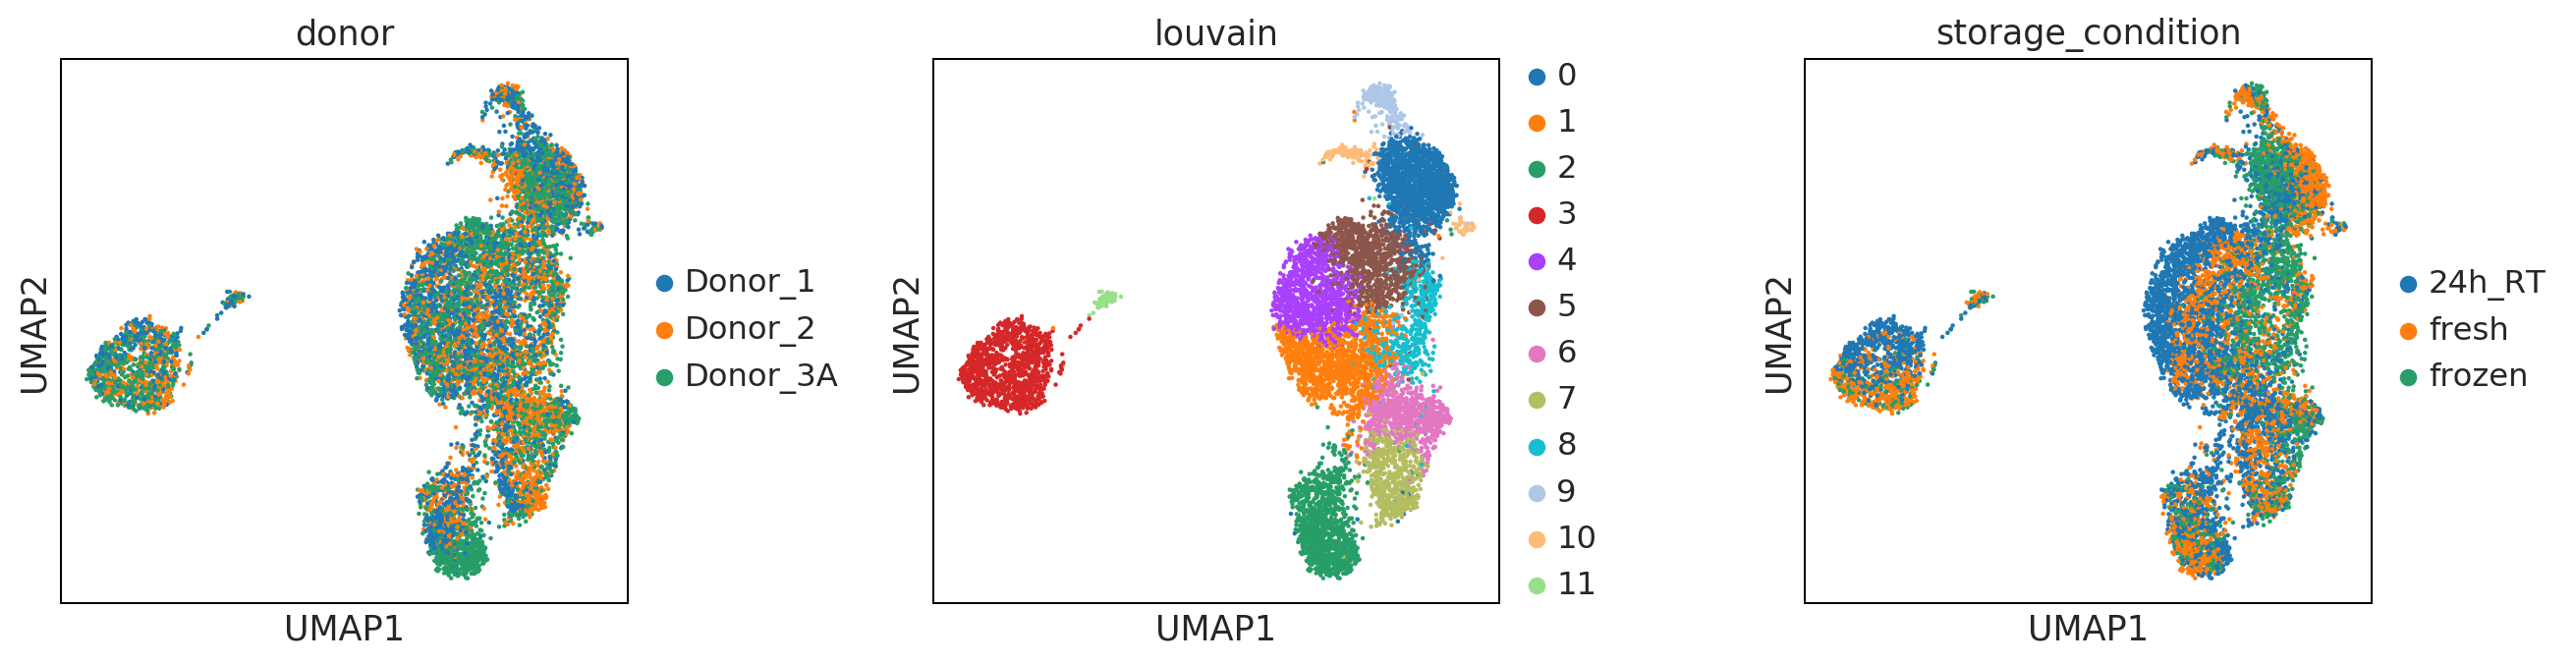

In [34]:
sc.settings.set_figure_params(dpi=90)
print('uncorrected')
sc.pl.umap(adata_uncorrected, color = ['donor', 'louvain', 'storage_condition'], wspace = 0.4)
print('mnnpy')
#sc.pl.umap(adata, color = ['donor', 'louvain', 'storage_condition'], wspace = 0.4) # Please uncommentn if you calculated adata_mnn (see above)
print('bbknn')
sc.pl.umap(adata_bbknn, color = ['donor', 'louvain', 'storage_condition'], wspace = 0.4)

mnnpy (precomputed and loaded from disc)
![alt_text](scRNAseq_tutorial.umap_comparison_figure.png)

<div class="task">
    <p> 15. Which batch correction method would you use? Why are there such large differences? What does this tell us about batch corrections? </p>
</div>

## Reload previously done cell annotation (from Introduction this morning)

This will aid us in labeling the celltypes found in the complete dataset.

<div class="tag">
    <p> After this point we will only proceed with the batch corrected dataset using the second batch correction method.</p>
</div>

In [35]:
#define genesets for cell type identification
b_cells = ['CD19', 'CD79A', 'MS4A1']
t_cells = ['CD3E', 'CD3G', 'CD3D']
t_cell_subsets = ['CD4', 'CD8A', 'CD8B']
naive_t_cell = ['SELL', 'CCR7', 'IL7R']
myeloid_cells = ['S100A8', 'S100A9', 'CST3']
monocytes = ['FCGR3A', 'CD14'] #FCGR3A/B = CD16
dendritic_cells = ['FCER1A', 'ITGAM', 'ITGAX'] #ITGAM = CD11b #ITGAX= CD11c 
NK_cells = ['NCAM1', 'NKG7', 'CD3G']

b_cells


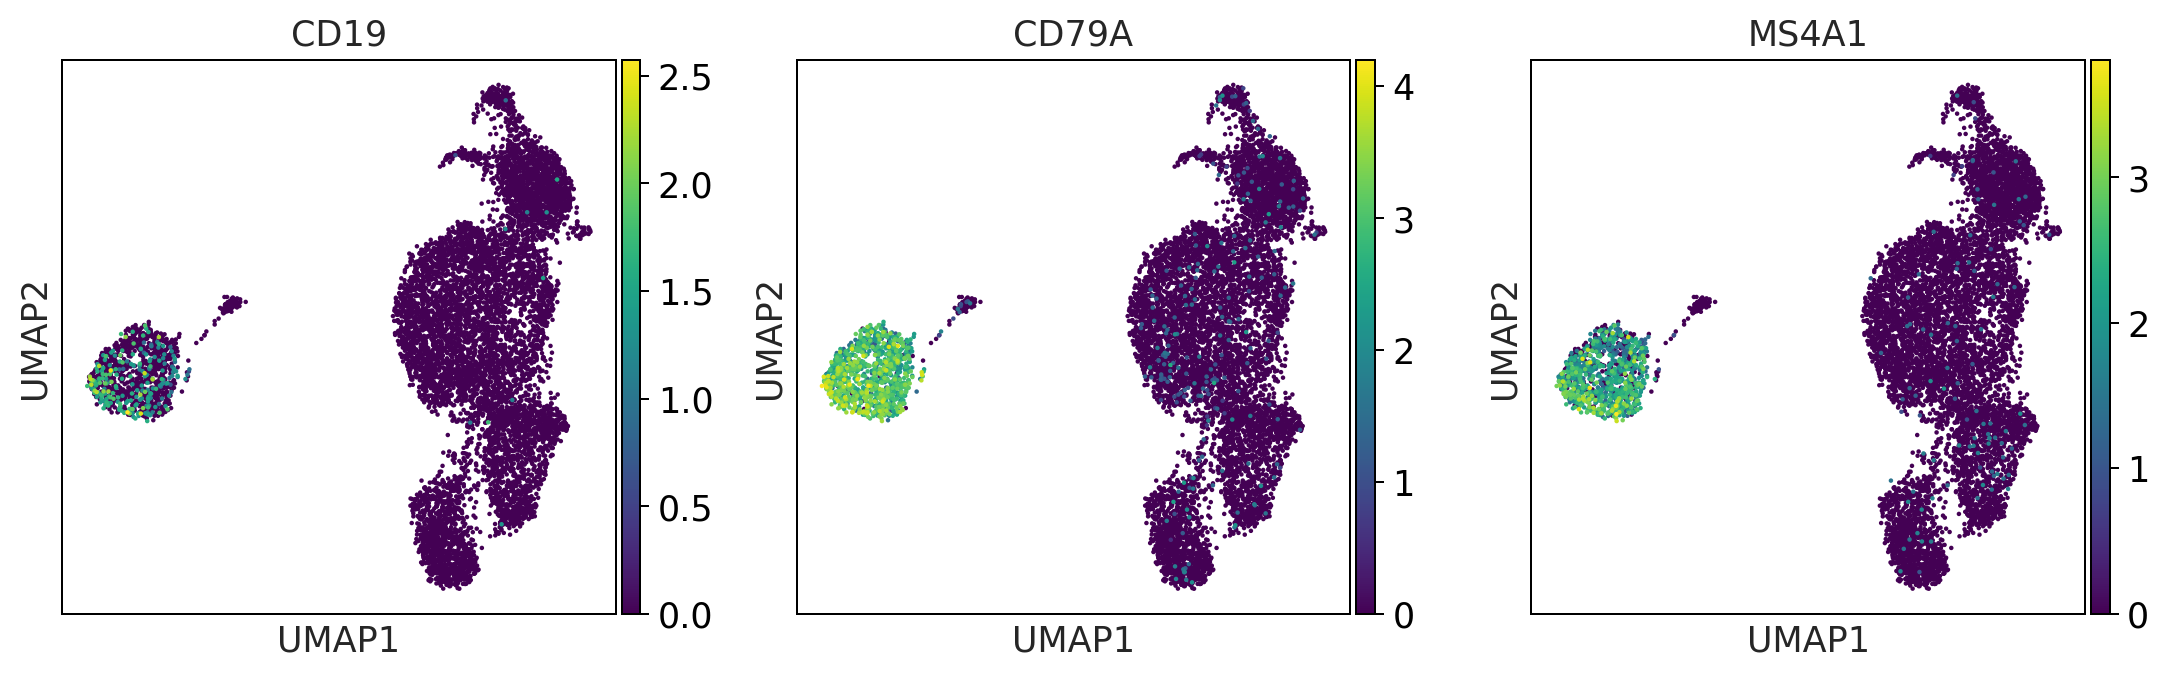

t_cells


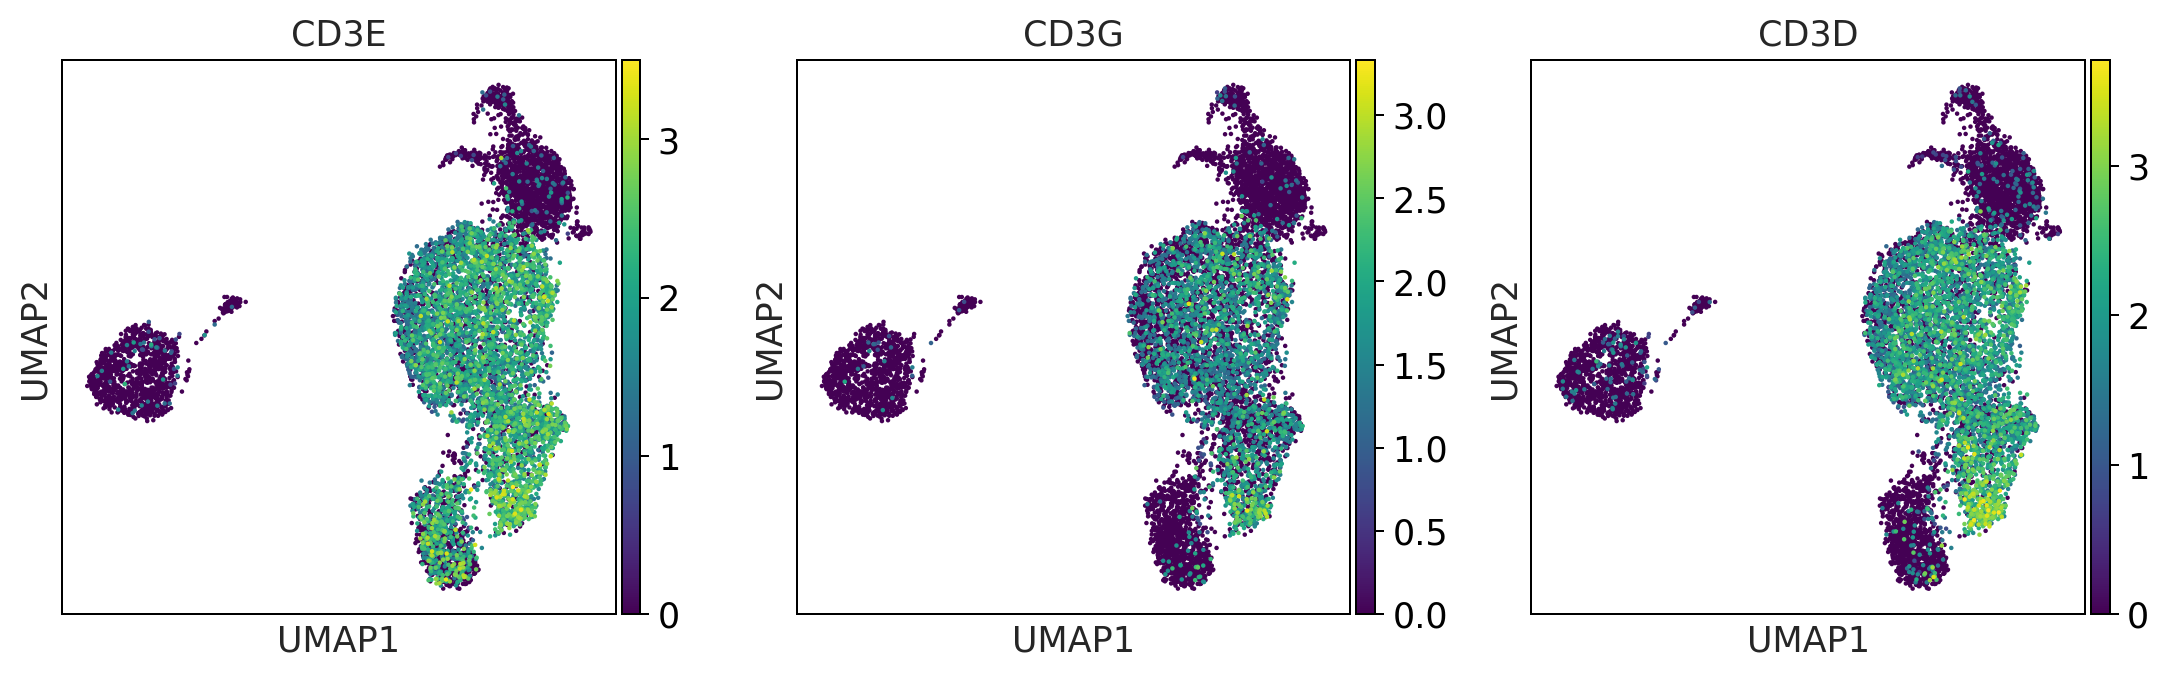

t_cell_subsets


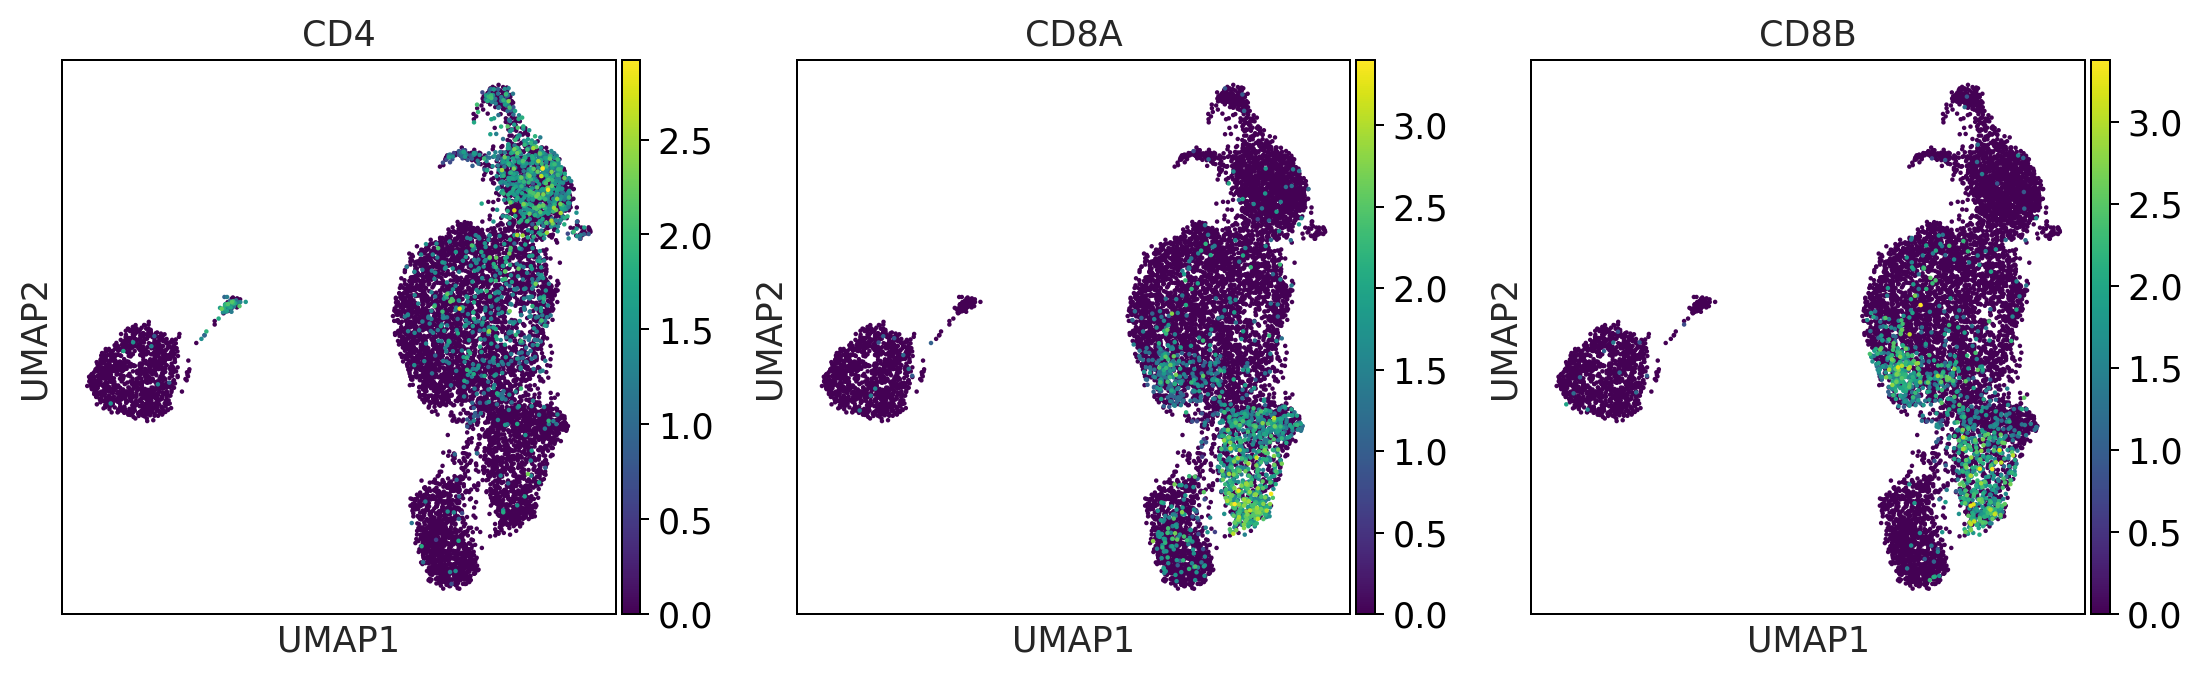

NK_cells


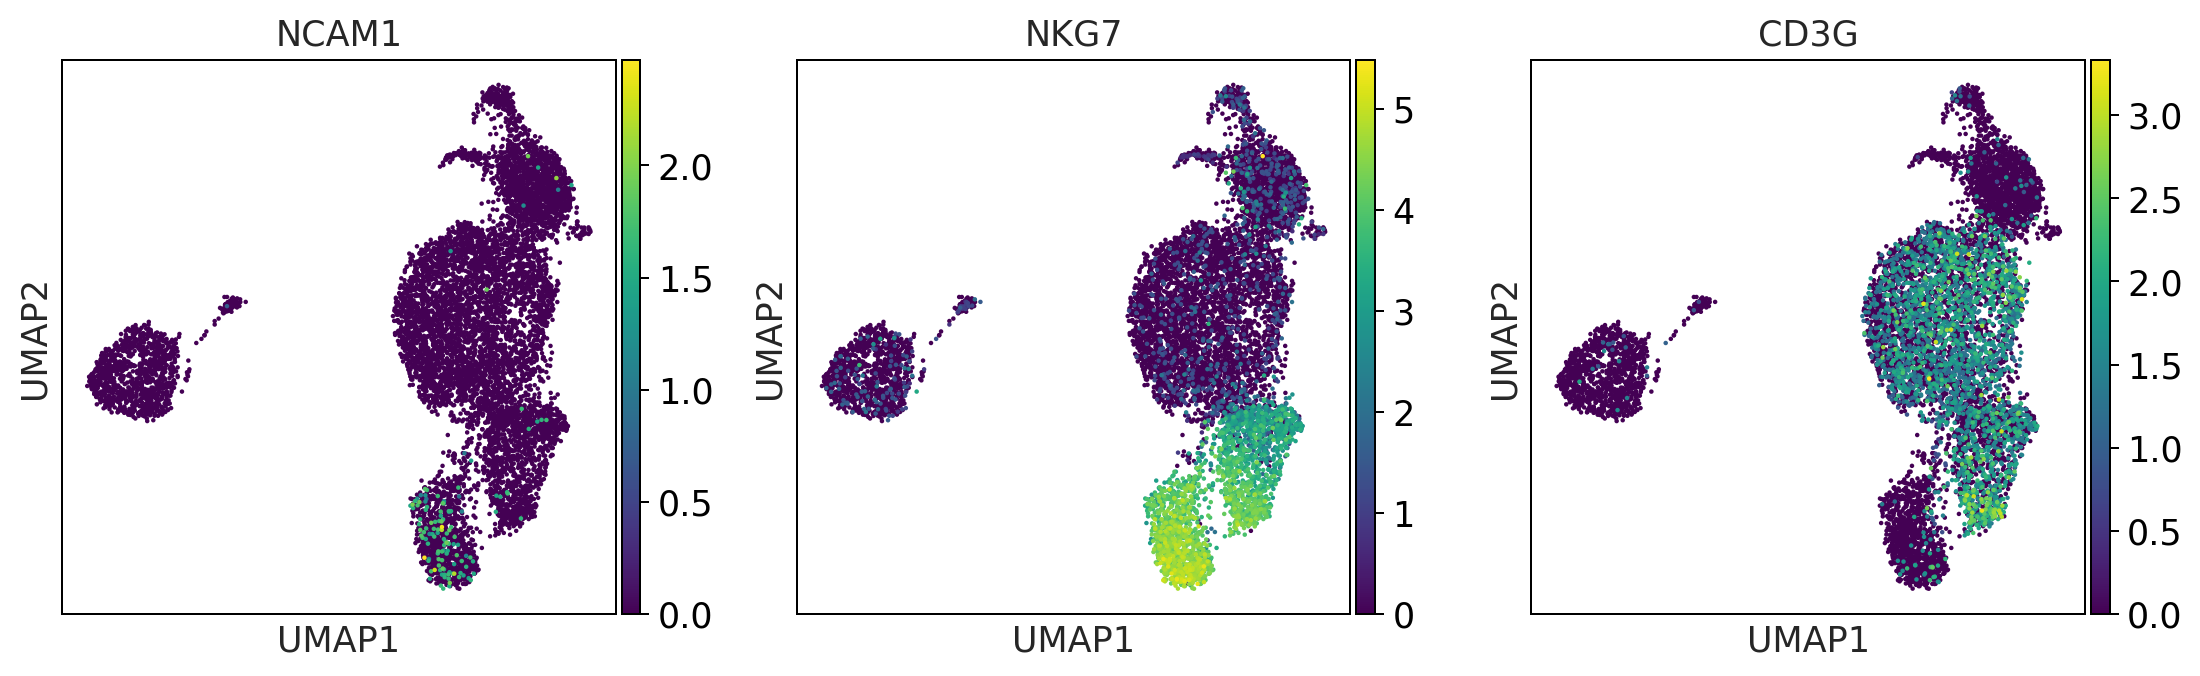

myeloid_cells


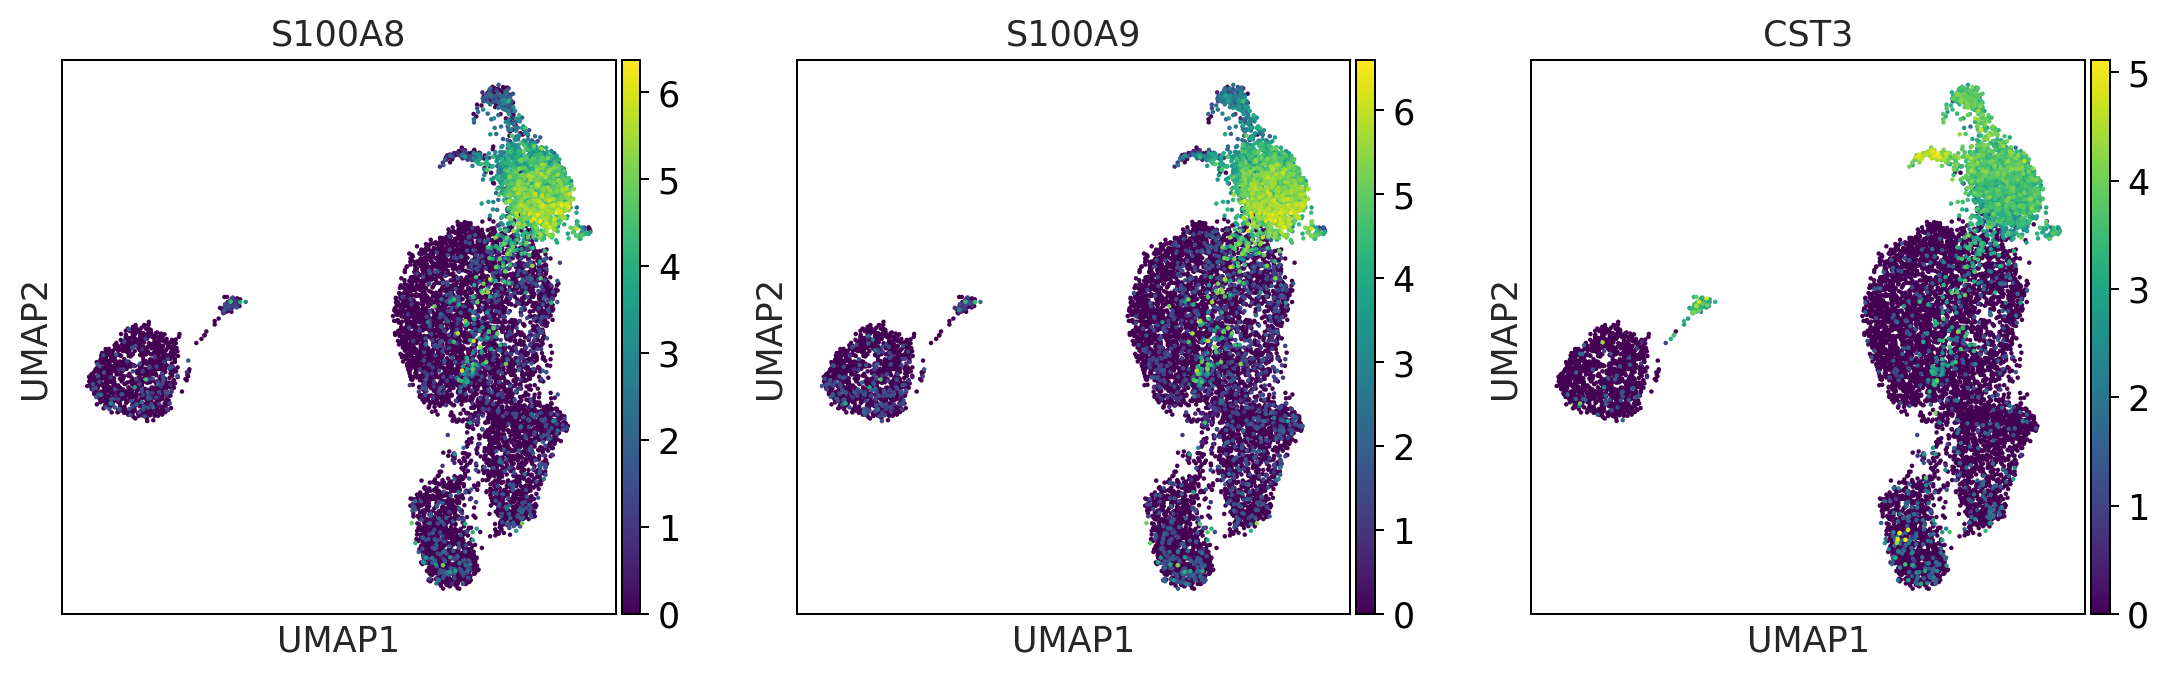

monocytes


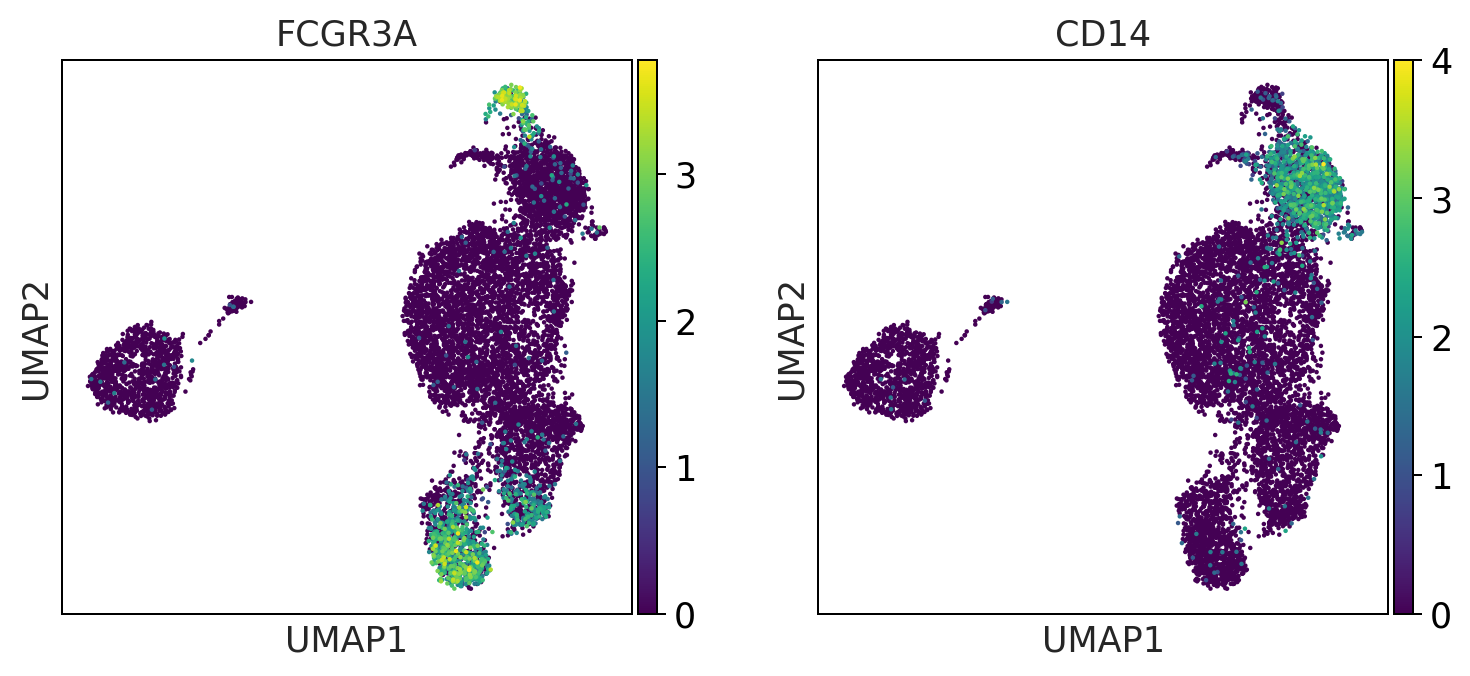

dendritic_cells


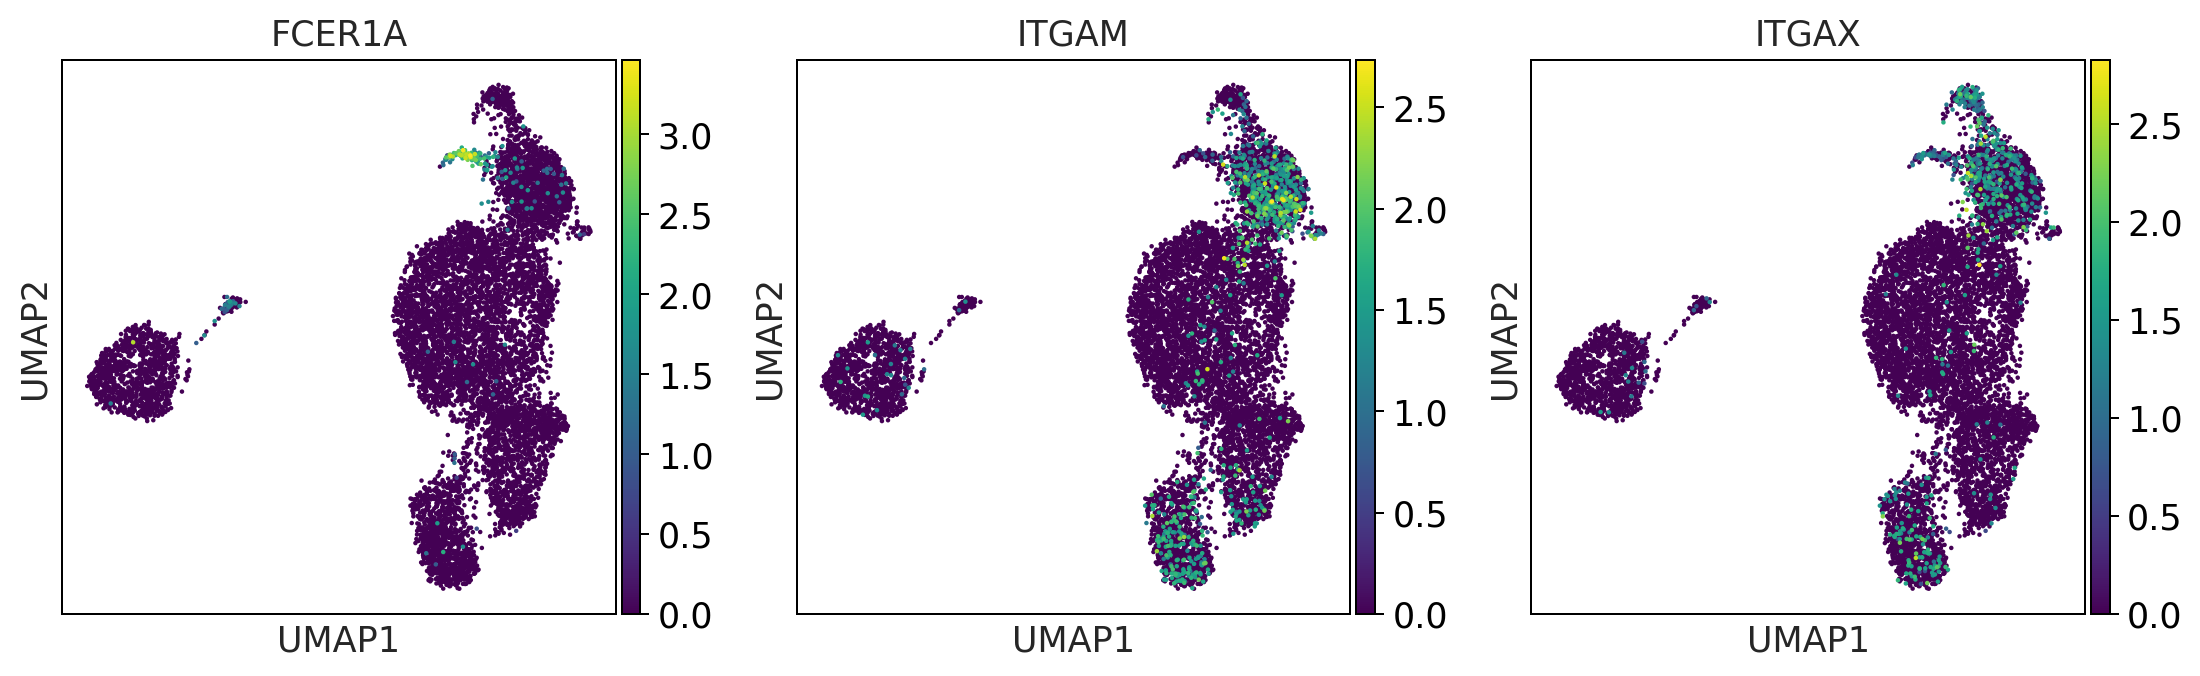

In [36]:
sc.settings.set_figure_params(dpi=90)
#visualize the gene expression as an overlay of the umap
#(this way you can visually identify the clusters with a high expression))
print('b_cells')
sc.pl.umap(adata_bbknn, color = b_cells, color_map = 'viridis', ncols = 3)
print('t_cells')
sc.pl.umap(adata_bbknn, color = t_cells, color_map = 'viridis', ncols = 3)
print('t_cell_subsets')
sc.pl.umap(adata_bbknn, color = t_cell_subsets, color_map = 'viridis', ncols = 3)
print('NK_cells')
sc.pl.umap(adata_bbknn, color = NK_cells,  color_map = 'viridis',ncols = 3)
print('myeloid_cells')
sc.pl.umap(adata_bbknn, color = myeloid_cells,  color_map = 'viridis',ncols = 3)
print('monocytes')
sc.pl.umap(adata_bbknn, color = monocytes, color_map = 'viridis', ncols = 3)
print('dendritic_cells')
sc.pl.umap(adata_bbknn, color = dendritic_cells, color_map = 'viridis', ncols = 3)

t_cell_subsets


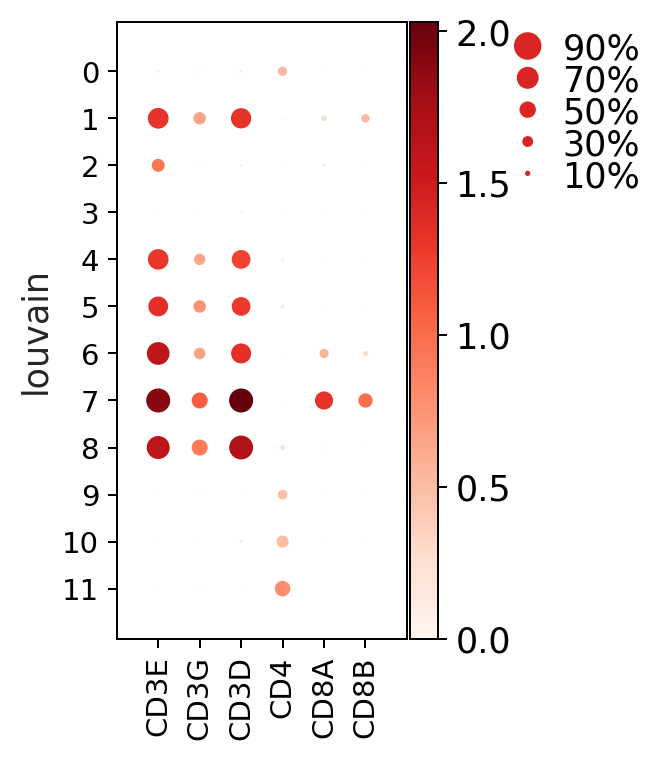

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[2.0999999999999996, 0, 0.2, 0.5, 0.25])

In [37]:
print('t_cell_subsets')
sc.pl.dotplot(adata_bbknn, groupby='louvain', var_names = t_cells + t_cell_subsets)

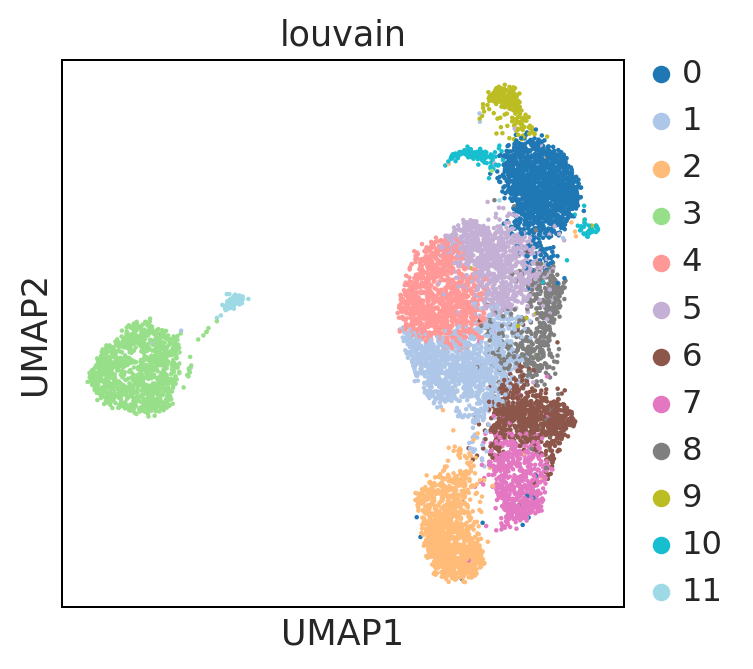

In [38]:
sc.pl.umap(adata_bbknn, color = ['louvain'], palette = 'tab20')

<div class="task">
    <p> Annotate the cell types. The celltypes you should annotate are: naive CD4 and CD8 T-cell, CD4 and CD8 T-cell, NK cell, B-cell, monocyte CD16+, monocyte CD14+, DC, pDC. Hint some of the clusters are mixed: label them with all the celltypes they contain. </p>
</div>

In [39]:
#celltype annotation
#write down new cluster names (important order needs to be equivalent to above)
#will label the cell types:

new_cluster_names = ['CD14+ monocyte', #0
                     'CD8 T-cell', #1
                     'NK cell', #2
                     'B-cell', #3
                     'CD4 T-cell', #4
                     'CD4 T-cell', #5
                     'CD8 T-cell', #6
                     'CD8 T-cell', #7
                     'CD4 T-cell', #8
                     'FCGR3A+ monocyte', #9
                     'CD14+ monocyte', #10
                     'unknown'] #11

bc.tl.annotate_cells_clustering(adata=adata_bbknn, clustering_label='louvain', new_annotation_label='celltype', new_cluster_labels=new_cluster_names)

In [40]:
adata_bbknn.obs

CELL  \
index                                                                                              
6.6K_inhouse_Donor_3A_24h_RT.GGCAATTCAGACGCCT-1  6.6K_inhouse_Donor_3A_24h_RT.GGCAATTCAGACGCCT-1   
6.6K_inhouse_Donor_2_FROZEN.CGGCTAGAGCTATGCT-1    6.6K_inhouse_Donor_2_FROZEN.CGGCTAGAGCTATGCT-1   
6.6K_inhouse_Donor_3A_FROZEN.GCGCGATAGTTCGATC-1  6.6K_inhouse_Donor_3A_FROZEN.GCGCGATAGTTCGATC-1   
6.6K_inhouse_Donor_2_24h_RT.TACCTTAGTTCACGGC-1    6.6K_inhouse_Donor_2_24h_RT.TACCTTAGTTCACGGC-1   
6.6K_inhouse_Donor_2_24h_RT.AACTCTTCAAGTTCTG-1    6.6K_inhouse_Donor_2_24h_RT.AACTCTTCAAGTTCTG-1   
6.6K_inhouse_Donor_2_24h_RT.CGCGGTAAGAGGGATA-1    6.6K_inhouse_Donor_2_24h_RT.CGCGGTAAGAGGGATA-1   
6.6K_inhouse_Donor_1_24h_RT.AGAGCTTCAGTATGCT-1    6.6K_inhouse_Donor_1_24h_RT.AGAGCTTCAGTATGCT-1   
6.6K_inhouse_Donor_1_FRESH.TCGAGGCTCTACTATC-1      6.6K_inhouse_Donor_1_FRESH.TCGAGGCTCTACTATC-1   
6.6K_inhouse_Donor_3A_FROZEN.AACCATGGTCCTAGCG-1  6.6K_inhouse_Donor_3A_FROZEN.AACCATGGTCCTAGCG-1   
6.6K_inhouse_Donor_2_24h_RT.GGACAAGTCCGCGCAA-1    6.6K_inhouse_Donor_2_24h_RT.GGACAAGTCCGCGCAA-1   
6.6K_inhouse_Donor_1_FROZEN.GGGACCTCATGAGCGA-1    6.6K_inhouse_Donor_1_FROZEN.GGGACCTCATGAGCGA-1   
6.6K_inhouse_Donor_1_24h_RT.TAGCCGGAGCTAACAA-1    6.6K_inhouse_Donor_1_24h_RT.TAGCCGGAGCTAACAA-1   
6.6K_inhouse_Donor_1_FROZEN.ACACCAATCCCGGATG-1    6.6K_inhouse_Donor_1_FROZEN.ACACCAATCCCGGATG-1   
6.6K_inhouse_Donor_2_FRESH.GGAACTTTCAGTTGAC-1      6.6K_inhouse_Donor_2_FRESH.GGAACTTTCAGTTGAC-1   
6.6K_inhouse_Donor_2_FRESH.ACGGAGATCCCATTAT-1      6.6K_inhouse_Donor_2_FRESH.ACGGAGATCCCATTAT-1   
6.6K_inhouse_Donor_3A_24h_RT.TGCGGGTCAAGAGTCG-1  6.6K_inhouse_Donor_3A_24h_RT.TGCGGGTCAAGAGTCG-1   
6.6K_inhouse_Donor_3A_FRESH.CCTCTGATCTCGTTTA-1    6.6K_inhouse_Donor_3A_FRESH.CCTCTGATCTCGTTTA-1   
6.6K_inhouse_Donor_1_FROZEN.GTGCAGCAGGCGCTCT-1    6.6K_inhouse_Donor_1_FROZEN.GTGCAGCAGGCGCTCT-1   
6.6K_inhouse_Donor_1_FROZEN.GAATAAGTCTGTACGA-1    6.6K_inhouse_Donor_1_FROZEN.GAATAAGTCTGTACGA-1   
6.6K_inhouse_Donor_1_FROZEN.GCCTCTAAGATGCGAC-1    6.6K_inhouse_Donor_1_FROZEN.GCCTCTAAGATGCGAC-1   
6.6K_inhouse_Donor_3A_24h_RT.CCTCAGTTCGAGAACG-1  6.6K_inhouse_Donor_3A_24h_RT.CCTCAGTTCGAGAACG-1   
6.6K_inhouse_Donor_1_FROZEN.CAACCAAAGCTGTTCA-1    6.6K_inhouse_Donor_1_FROZEN.CAACCAAAGCTGTTCA-1   
6.6K_inhouse_Donor_1_FRESH.TGGCGCAGTGAGTGAC-1      6.6K_inhouse_Donor_1_FRESH.TGGCGCAGTGAGTGAC-1   
6.6K_inhouse_Donor_1_24h_RT.GGCTCGATCCGATATG-1    6.6K_inhouse_Donor_1_24h_RT.GGCTCGATCCGATATG-1   
6.6K_inhouse_Donor_1_FROZEN.GGTGAAGGTTAGATGA-1    6.6K_inhouse_Donor_1_FROZEN.GGTGAAGGTTAGATGA-1   
6.6K_inhouse_Donor_3A_24h_RT.ATGAGGGAGCAATCTC-1  6.6K_inhouse_Donor_3A_24h_RT.ATGAGGGAGCAATCTC-1   
6.6K_inhouse_Donor_1_24h_RT.TCTCTAACACATGTGT-1    6.6K_inhouse_Donor_1_24h_RT.TCTCTAACACATGTGT-1   
6.6K_inhouse_Donor_2_24h_RT.TACGGTAGTGAGGGAG-1    6.6K_inhouse_Donor_2_24h_RT.TACGGTAGTGAGGGAG-1   
6.6K_inhouse_Donor_3A_24h_RT.CTCGTCATCGAATCCA-1  6.6K_inhouse_Donor_3A_24h_RT.CTCGTCATCGAATCCA-1   
6.6K_inhouse_Donor_2_FRESH.AGGGAGTAGAAACCAT-1      6.6K_inhouse_Donor_2_FRESH.AGGGAGTAGAAACCAT-1   
...                                                                                          ...   
6.6K_inhouse_Donor_2_24h_RT.AGCTTGAGTTGTCGCG-1    6.6K_inhouse_Donor_2_24h_RT.AGCTTGAGTTGTCGCG-1   
6.6K_inhouse_Donor_2_FROZEN.CGTCAGGCAAATACAG-1    6.6K_inhouse_Donor_2_FROZEN.CGTCAGGCAAATACAG-1   
6.6K_inhouse_Donor_2_24h_RT.ACCTTTAGTAAACCTC-1    6.6K_inhouse_Donor_2_24h_RT.ACCTTTAGTAAACCTC-1   
6.6K_inhouse_Donor_3A_FROZEN.AGAGCGAGTCATCGGC-1  6.6K_inhouse_Donor_3A_FROZEN.AGAGCGAGTCATCGGC-1   
6.6K_inhouse_Donor_3A_FRESH.CTGTTTATCTACCAGA-1    6.6K_inhouse_Donor_3A_FRESH.CTGTTTATCTACCAGA-1   
6.6K_inhouse_Donor_1_24h_RT.CGCTGGAGTGCCTGGT-1    6.6K_inhouse_Donor_1_24h_RT.CGCTGGAGTGCCTGGT-1   
6.6K_inhouse_Donor_3A_FRESH.GTACTTTCATTGCGGC-1    6.6K_inhouse_Donor_3A_FRESH.GTACTTTCATTGCGGC-1   
6.6K_inhouse_Donor_1_24h_RT.GGAGCAAGTAAGGGAA-1    6.6K_inhouse_Donor_1_24h_RT.GGAGCAAGTAAGGG

In [41]:
# The bbknn corrected and annotated dataset can be loaded using
adata_bbknn = bc.datasets.pbmc_storage_processed()

## Quantify celltypes per donor

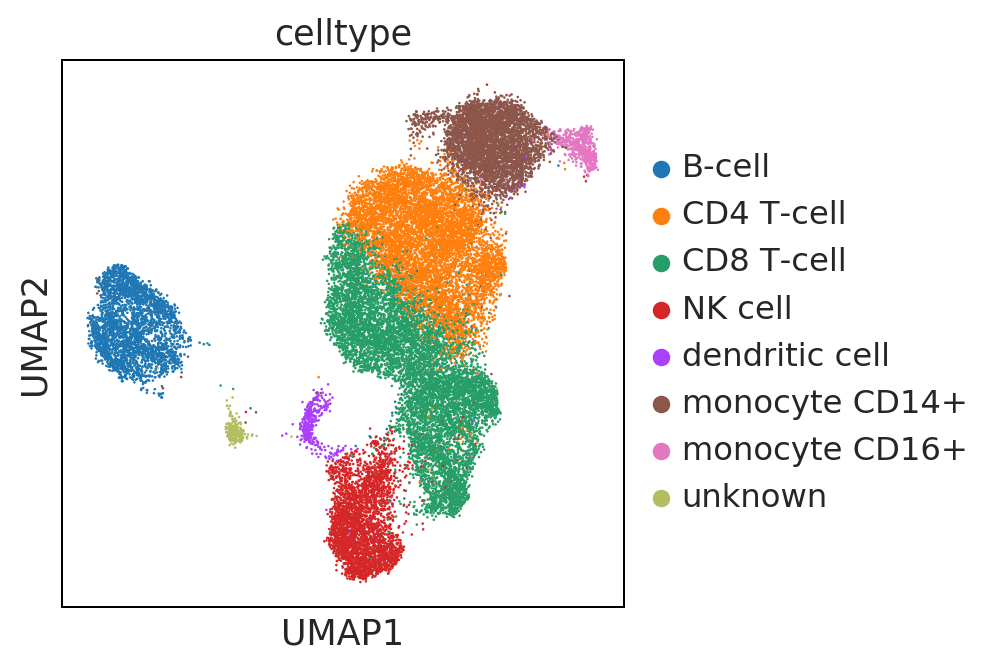

In [42]:
sc.pl.umap(adata_bbknn, color = ['celltype'])

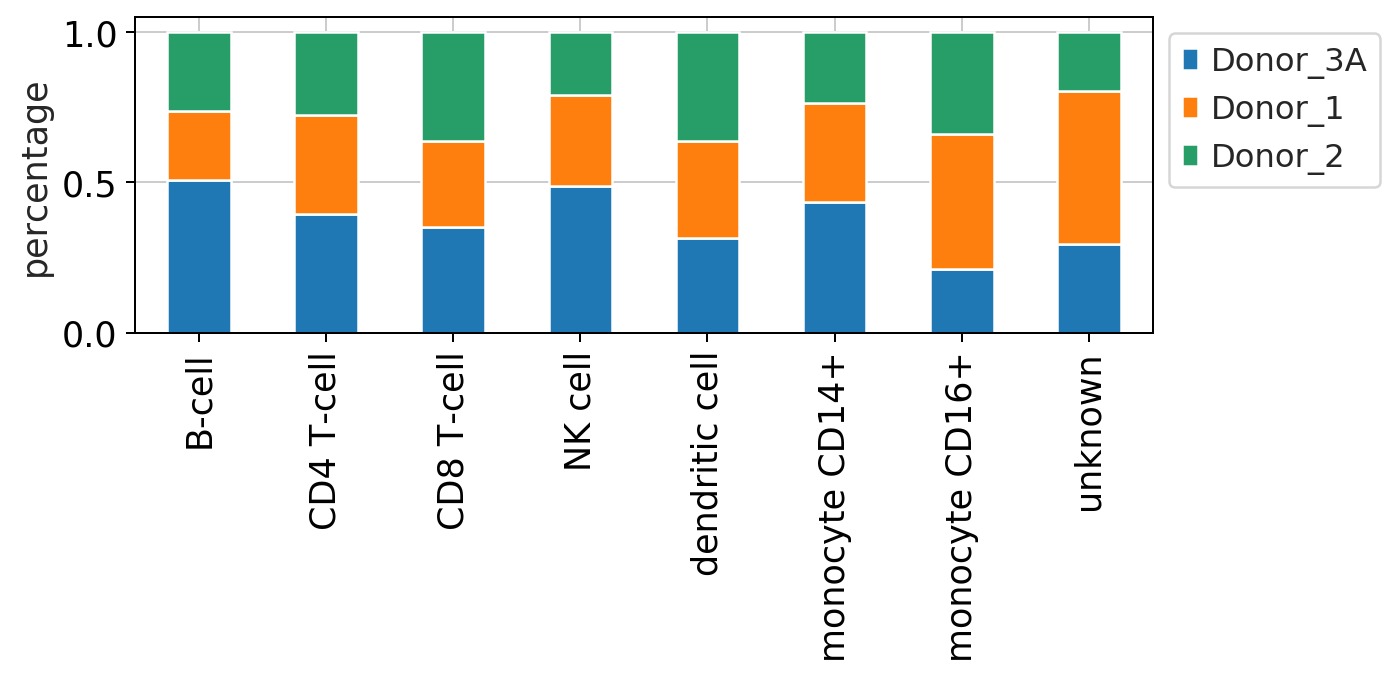

In [43]:
fig = bc.pl.celllabel_quant_stackedbar(adata_bbknn, count_variable='celltype', subset_variable = 'donor');

## Little excursion into differential gene expression analysis

In [44]:
sc.tl.rank_genes_groups(adata_bbknn, use_raw = True, groupby = 'storage_condition')

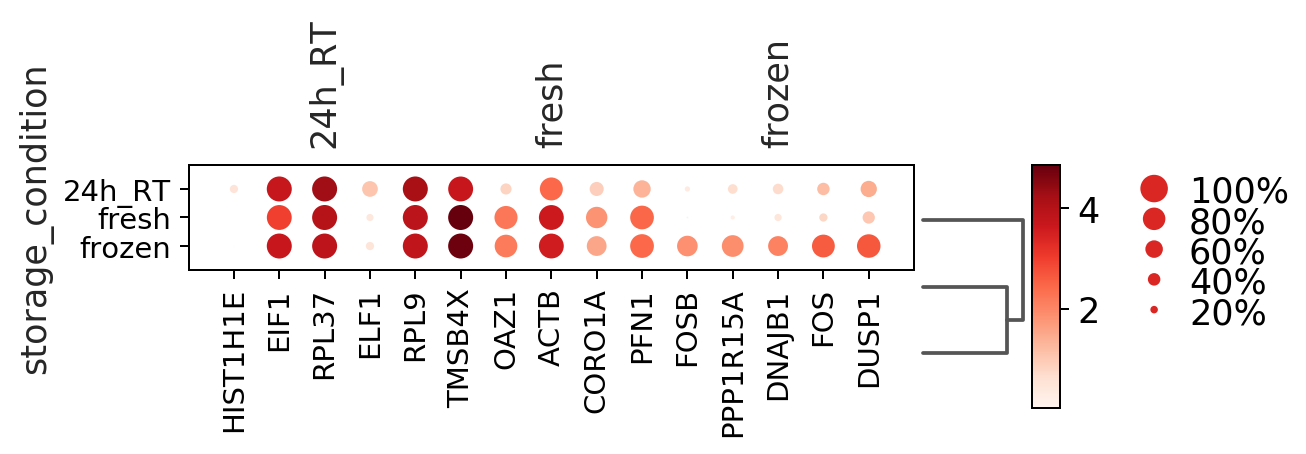

In [45]:
sc.pl.rank_genes_groups_dotplot(adata_bbknn, n_genes=5, groupby = 'storage_condition')

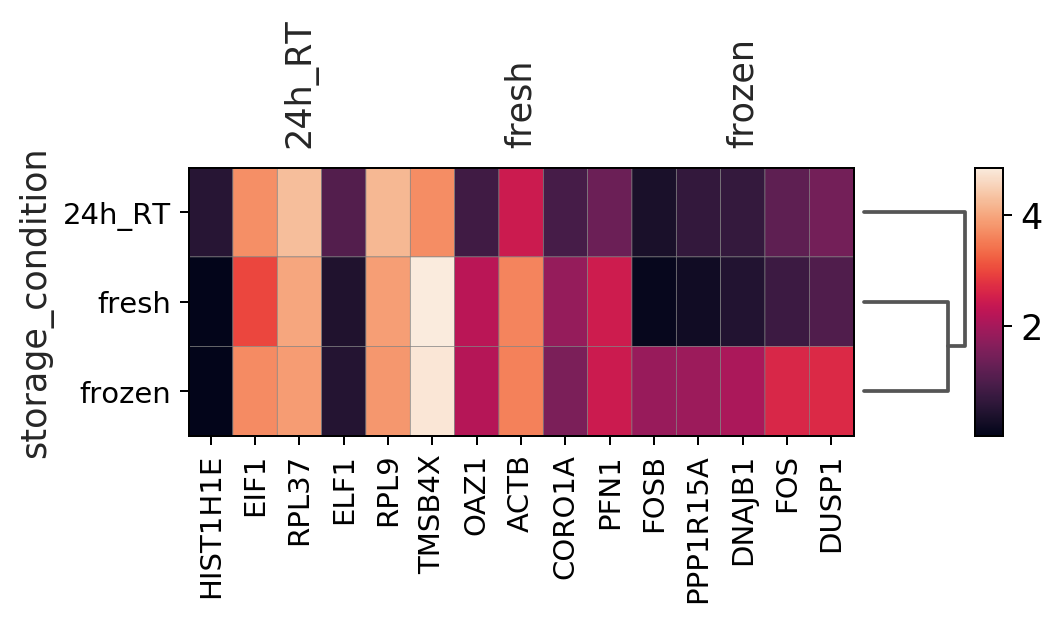

In [46]:
sc.pl.rank_genes_groups_matrixplot(adata_bbknn, n_genes=5, use_raw=True, groupby = 'storage_condition')

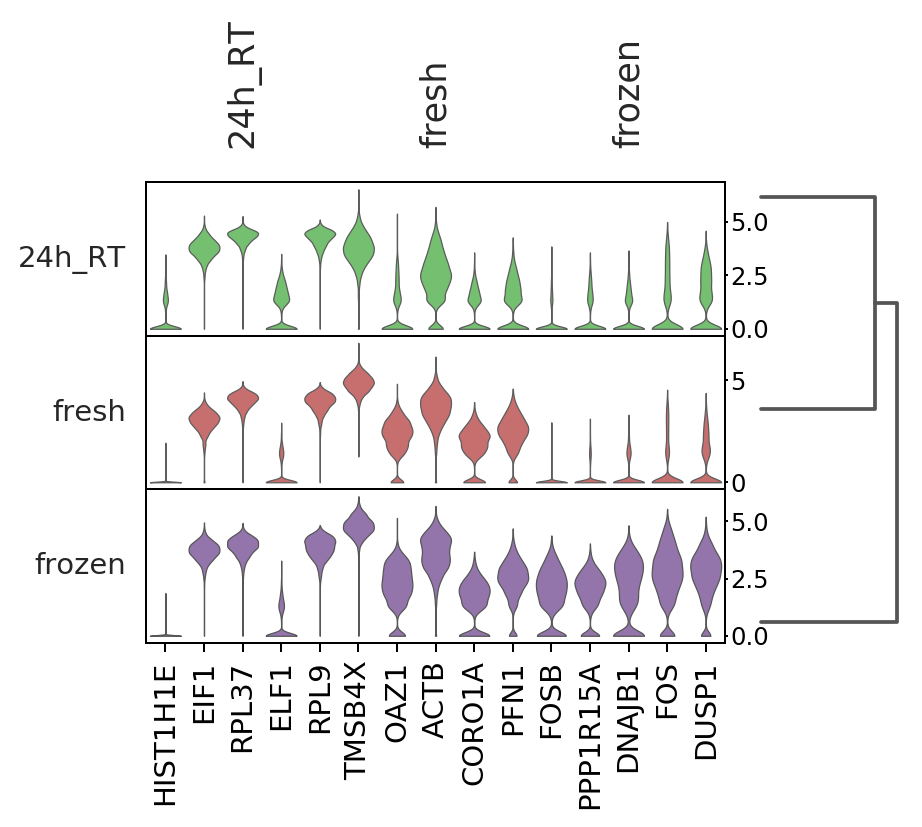

In [47]:
sc.pl.rank_genes_groups_stacked_violin(adata_bbknn, n_genes=5, groupby='storage_condition')